# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [ ]:
%pip install pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 5.2 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 11.9 MB/s eta 0:00:0000:0100:01
Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux

In [10]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()
import matplotlib.pyplot as plt

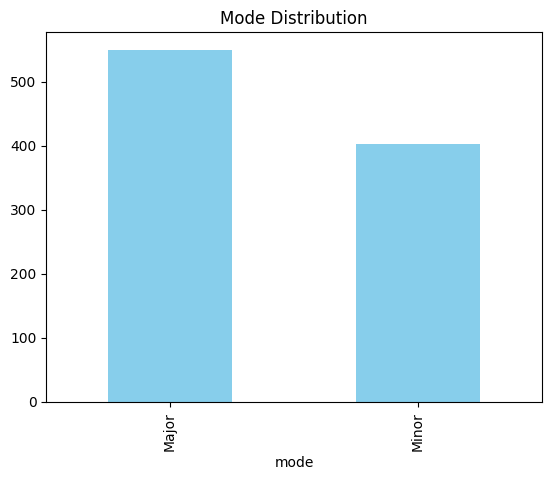

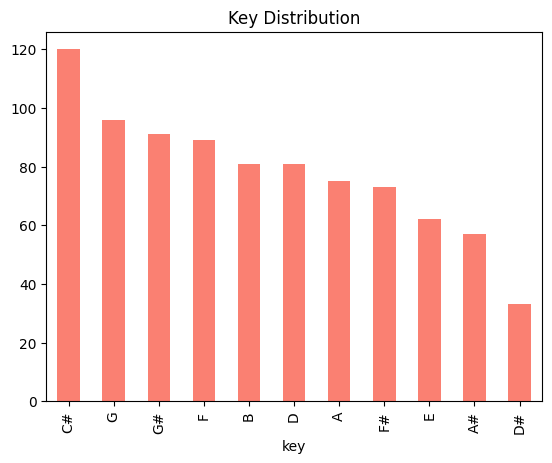

In [3]:
# 1. Visualize Mode (Major vs Minor)
plt.figure() # Creates a new blank graph
df['mode'].value_counts().plot(kind='bar', color='skyblue', title='Mode Distribution')
plt.show()   # Displays the graph

# 2. Visualize Key (Which musical key is most popular?)
plt.figure() # Creates another blank graph
df['key'].value_counts().plot(kind='bar', color='salmon', title='Key Distribution')
plt.show()

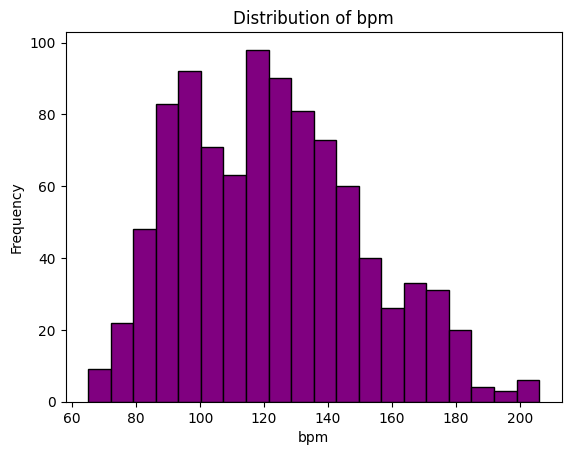

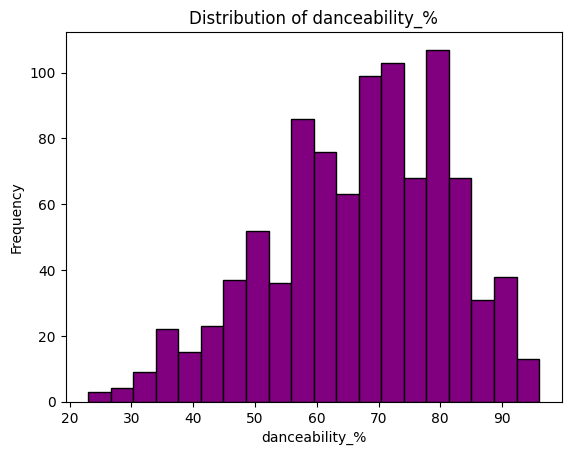

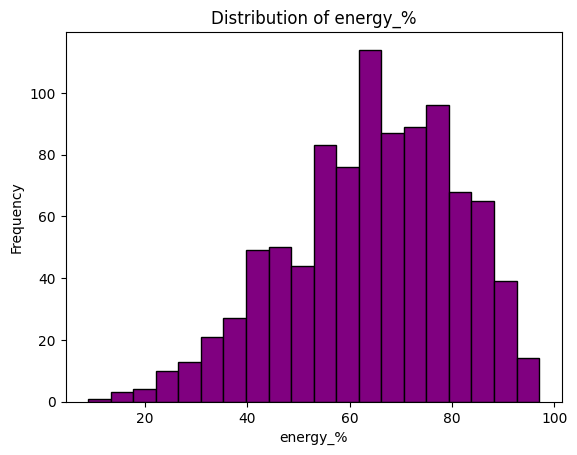

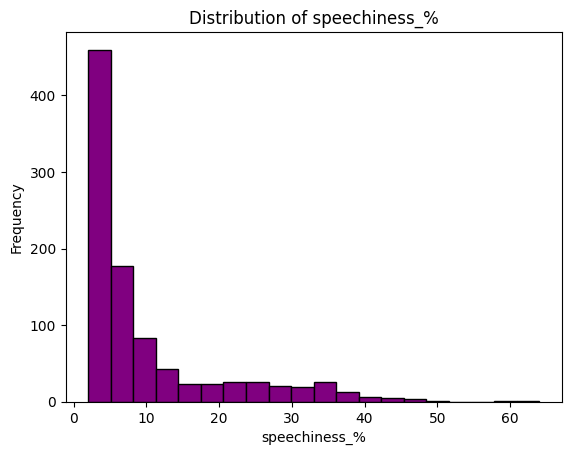

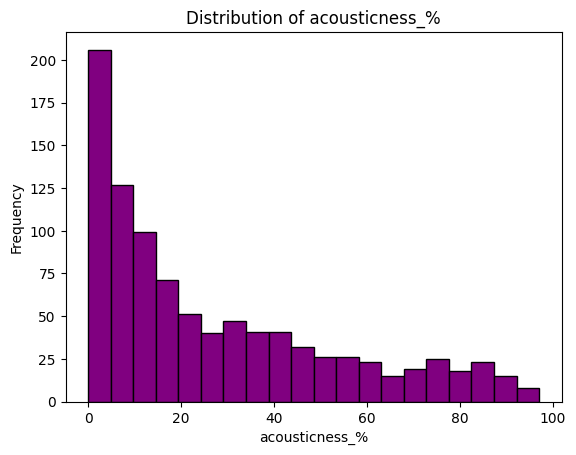

In [9]:
# 3. Visualize the numerical features (BPM, Danceability, etc.)
features_to_plot = ['bpm', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']

for feature in features_to_plot:
    plt.figure() # Create a new blank graph for each feature
    df[feature].plot(kind='hist', bins=20, title=f'Distribution of {feature}', color='purple', edgecolor='black')
    plt.xlabel(feature)
    plt.show()

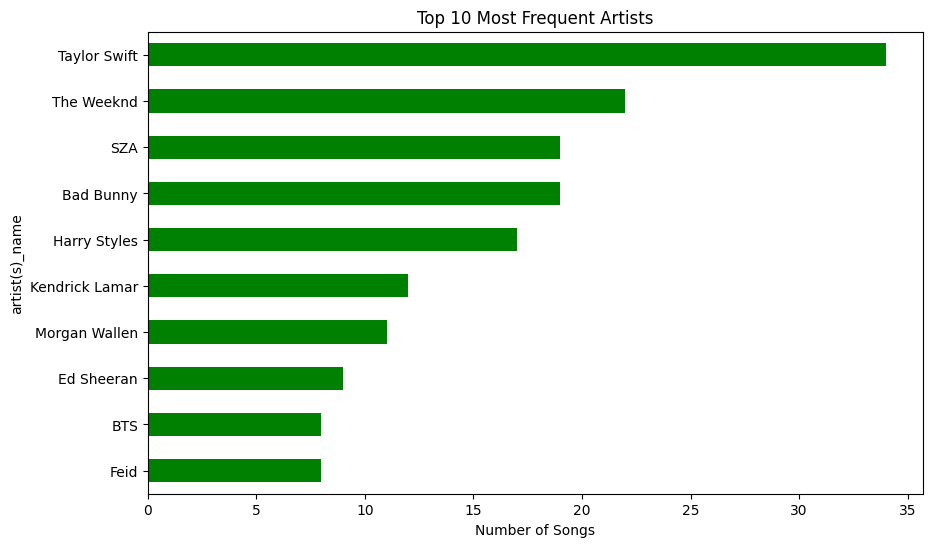

In [5]:
# 4. Visualize the Top 10 Artists
plt.figure(figsize=(10,6)) # Makes the graph a bit bigger
df['artist(s)_name'].value_counts().head(10).plot(kind='barh', color='green', title='Top 10 Most Frequent Artists')
plt.gca().invert_yaxis() # Puts the #1 artist at the top
plt.xlabel('Number of Songs')
plt.show()

### My Smash Hit Criteria
Based on the visualizations, a hit song should have:
* **Mode:** Major (It was the most common)
* **Key:** C# (It was the most common)
* **BPM:** 120-130 (The most frequent range)
* **Danceability:** 60-80% (The most frequent range)
* **Energy:** 60-70% (The most frequent range)

In [7]:
# Filter for songs that match our "Smash Hit" criteria
# UPDATE THESE with the numbers from your graphs!
target_mode = 'Major'
target_key = 'C#' 
bpm_min = 120
bpm_max = 130
dance_min = 60
dance_max = 80

# The Code to find the songs
hits = df[
    (df['mode'] == target_mode) &
    (df['key'] == target_key) &
    (df['bpm'] >= bpm_min) & (df['bpm'] <= bpm_max) &
    (df['danceability_%'] >= dance_min) & (df['danceability_%'] <= dance_max)
]

print(f"Found {len(hits)} potential smash hits:")
hits[['track_name', 'artist(s)_name', 'streams']]

Found 4 potential smash hits:


,track_name,artist(s)_name,streams
168,We Found Love,"Rihanna, Calvin Harris",1235005533
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",57089066
518,Need To Know,Doja Cat,1042568408
881,cï¿½ï¿½mo dormi,Rels B,331511413


In [8]:
# Check a specific song
song_check = df[df['track_name'] == 'Cruel Summer']
song_check[['track_name', 'bpm', 'key', 'mode', 'danceability_%']]

,track_name,bpm,key,mode,danceability_%
3,Cruel Summer,170,A,Major,55


### Comparison: Engineered Hit vs. Real Hit
I picked the song **"Cruel Summer" by Taylor Swift** (a known smash hit) to test against my recipe.

**The Comparison:**
* **Key:** My recipe called for **C#**, but Cruel Summer is in **A**.
* **BPM:** My recipe recommended **120-130 BPM**, but Cruel Summer is much faster at **170 BPM**.
* **Danceability:** My recipe suggested **60-80%**, but Cruel Summer is lower at **55%**.
* **Mode:** My recipe called for **Major**, and Cruel Summer matches this!

**Conclusion:**
My "engineered" song was based on the *average* features of popular music, but a real smash hit like "Cruel Summer" is an **outlier**. It succeeds despite breaking the rules (it's faster and less danceable than the typical hit). This proves that while data can show us trends, it cannot perfectly predict every individual success in art.